# EV Prediction 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# read excel file in dataframe
df = pd.read_excel('EVdata_V4.xlsx')
df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7                  NaN   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4            NaN                     NaN          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

In [4]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Province                161 non-null    object 
 1   Province_Code           161 non-null    object 
 2   Quarter                 161 non-null    object 
 3   Year                    161 non-null    int64  
 4   Median_Age              161 non-null    float64
 5   Greenhouse_Emission     112 non-null    float64
 6   Median_Income           96 non-null     float64
 7   Median_After_TaxIncome  112 non-null    float64
 8   Total_Population        161 non-null    int64  
 9   Other_Vehicles          161 non-null    int64  
 10  Plugin_Hybrid_EV        161 non-null    int64  
 11  Hybrid_EV               161 non-null    int64  
 12  Battery_EV              161 non-null    int64  
 13  Charging_Stations       130 non-null    float64
 14  All_Fuel_Types          161 non-null    in

In [5]:
# data dimension
df.shape

(161, 16)

In [6]:
# Columns of dataset
df.columns

Index(['Province', 'Province_Code', 'Quarter', 'Year', 'Median_Age',
       'Greenhouse_Emission', 'Median_Income', 'Median_After_TaxIncome',
       'Total_Population', 'Other_Vehicles', 'Plugin_Hybrid_EV', 'Hybrid_EV',
       'Battery_EV', 'Charging_Stations', 'All_Fuel_Types', 'Total_EV'],
      dtype='object')

In [7]:
df.describe()

Year  Median_Age  Greenhouse_Emission  Median_Income  \
count   161.000000  161.000000           112.000000      96.000000   
mean   2019.391304   41.353416         59666.285714   37025.416667   
std       1.666485    2.824602         50766.002076    2409.856915   
min    2017.000000   37.200000          1610.000000   32620.000000   
25%    2018.000000   38.100000         13711.500000   35165.000000   
50%    2019.000000   42.100000         64218.500000   37060.000000   
75%    2021.000000   43.000000         80301.500000   38737.500000   
max    2022.000000   46.200000        167268.000000   41850.000000   

       Median_After_TaxIncome  Total_Population  Other_Vehicles  \
count              112.000000      1.610000e+02      161.000000   
mean             60625.000000      4.271952e+06    49939.155280   
std               4934.060696      4.889048e+06    60258.349437   
min              52200.000000      1.481810e+05      864.000000   
25%              56000.000000      1.172479e+06     9201.000000   
50%              61100.000000      1.379138e+06    13971.000000   
75%              64500.000000      5.273809e+06    79994.000000   
max              70100.000000      1.510942e+07   230193.000000   

       Plugin_Hybrid_EV     Hybrid_EV   Battery_EV  Charging_Stations  \
count        161.000000    161.000000   161.000000         130.000000   
mean         685.745342   1478.428571  1408.515528          45.476923   
std         1025.783629   2149.540276  2190.415694         127.144623   
min            0.000000      8.000000     0.000000           1.000000   
25%           13.000000     97.000000    16.000000           4.000000   
50%           54.000000    399.000000    89.000000          12.500000   
75%         1198.000000   2346.000000  2180.000000          54.750000   
max         4355.000000  11650.000000  9784.000000        1392.000000   

       All_Fuel_Types      Total_EV  
count      161.000000    161.000000  
mean     53511.844720   3572.689441  
std      63593.757341   4903.840050  
min        889.000000      9.000000  
25%       9447.000000    115.000000  
50%      14077.000000    577.000000  
75%      85984.000000   5901.000000  
max     239898.000000  21183.000000

In [8]:
# check null values
df.isnull().sum()

Province                   0
Province_Code              0
Quarter                    0
Year                       0
Median_Age                 0
Greenhouse_Emission       49
Median_Income             65
Median_After_TaxIncome    49
Total_Population           0
Other_Vehicles             0
Plugin_Hybrid_EV           0
Hybrid_EV                  0
Battery_EV                 0
Charging_Stations         31
All_Fuel_Types             0
Total_EV                   0
dtype: int64

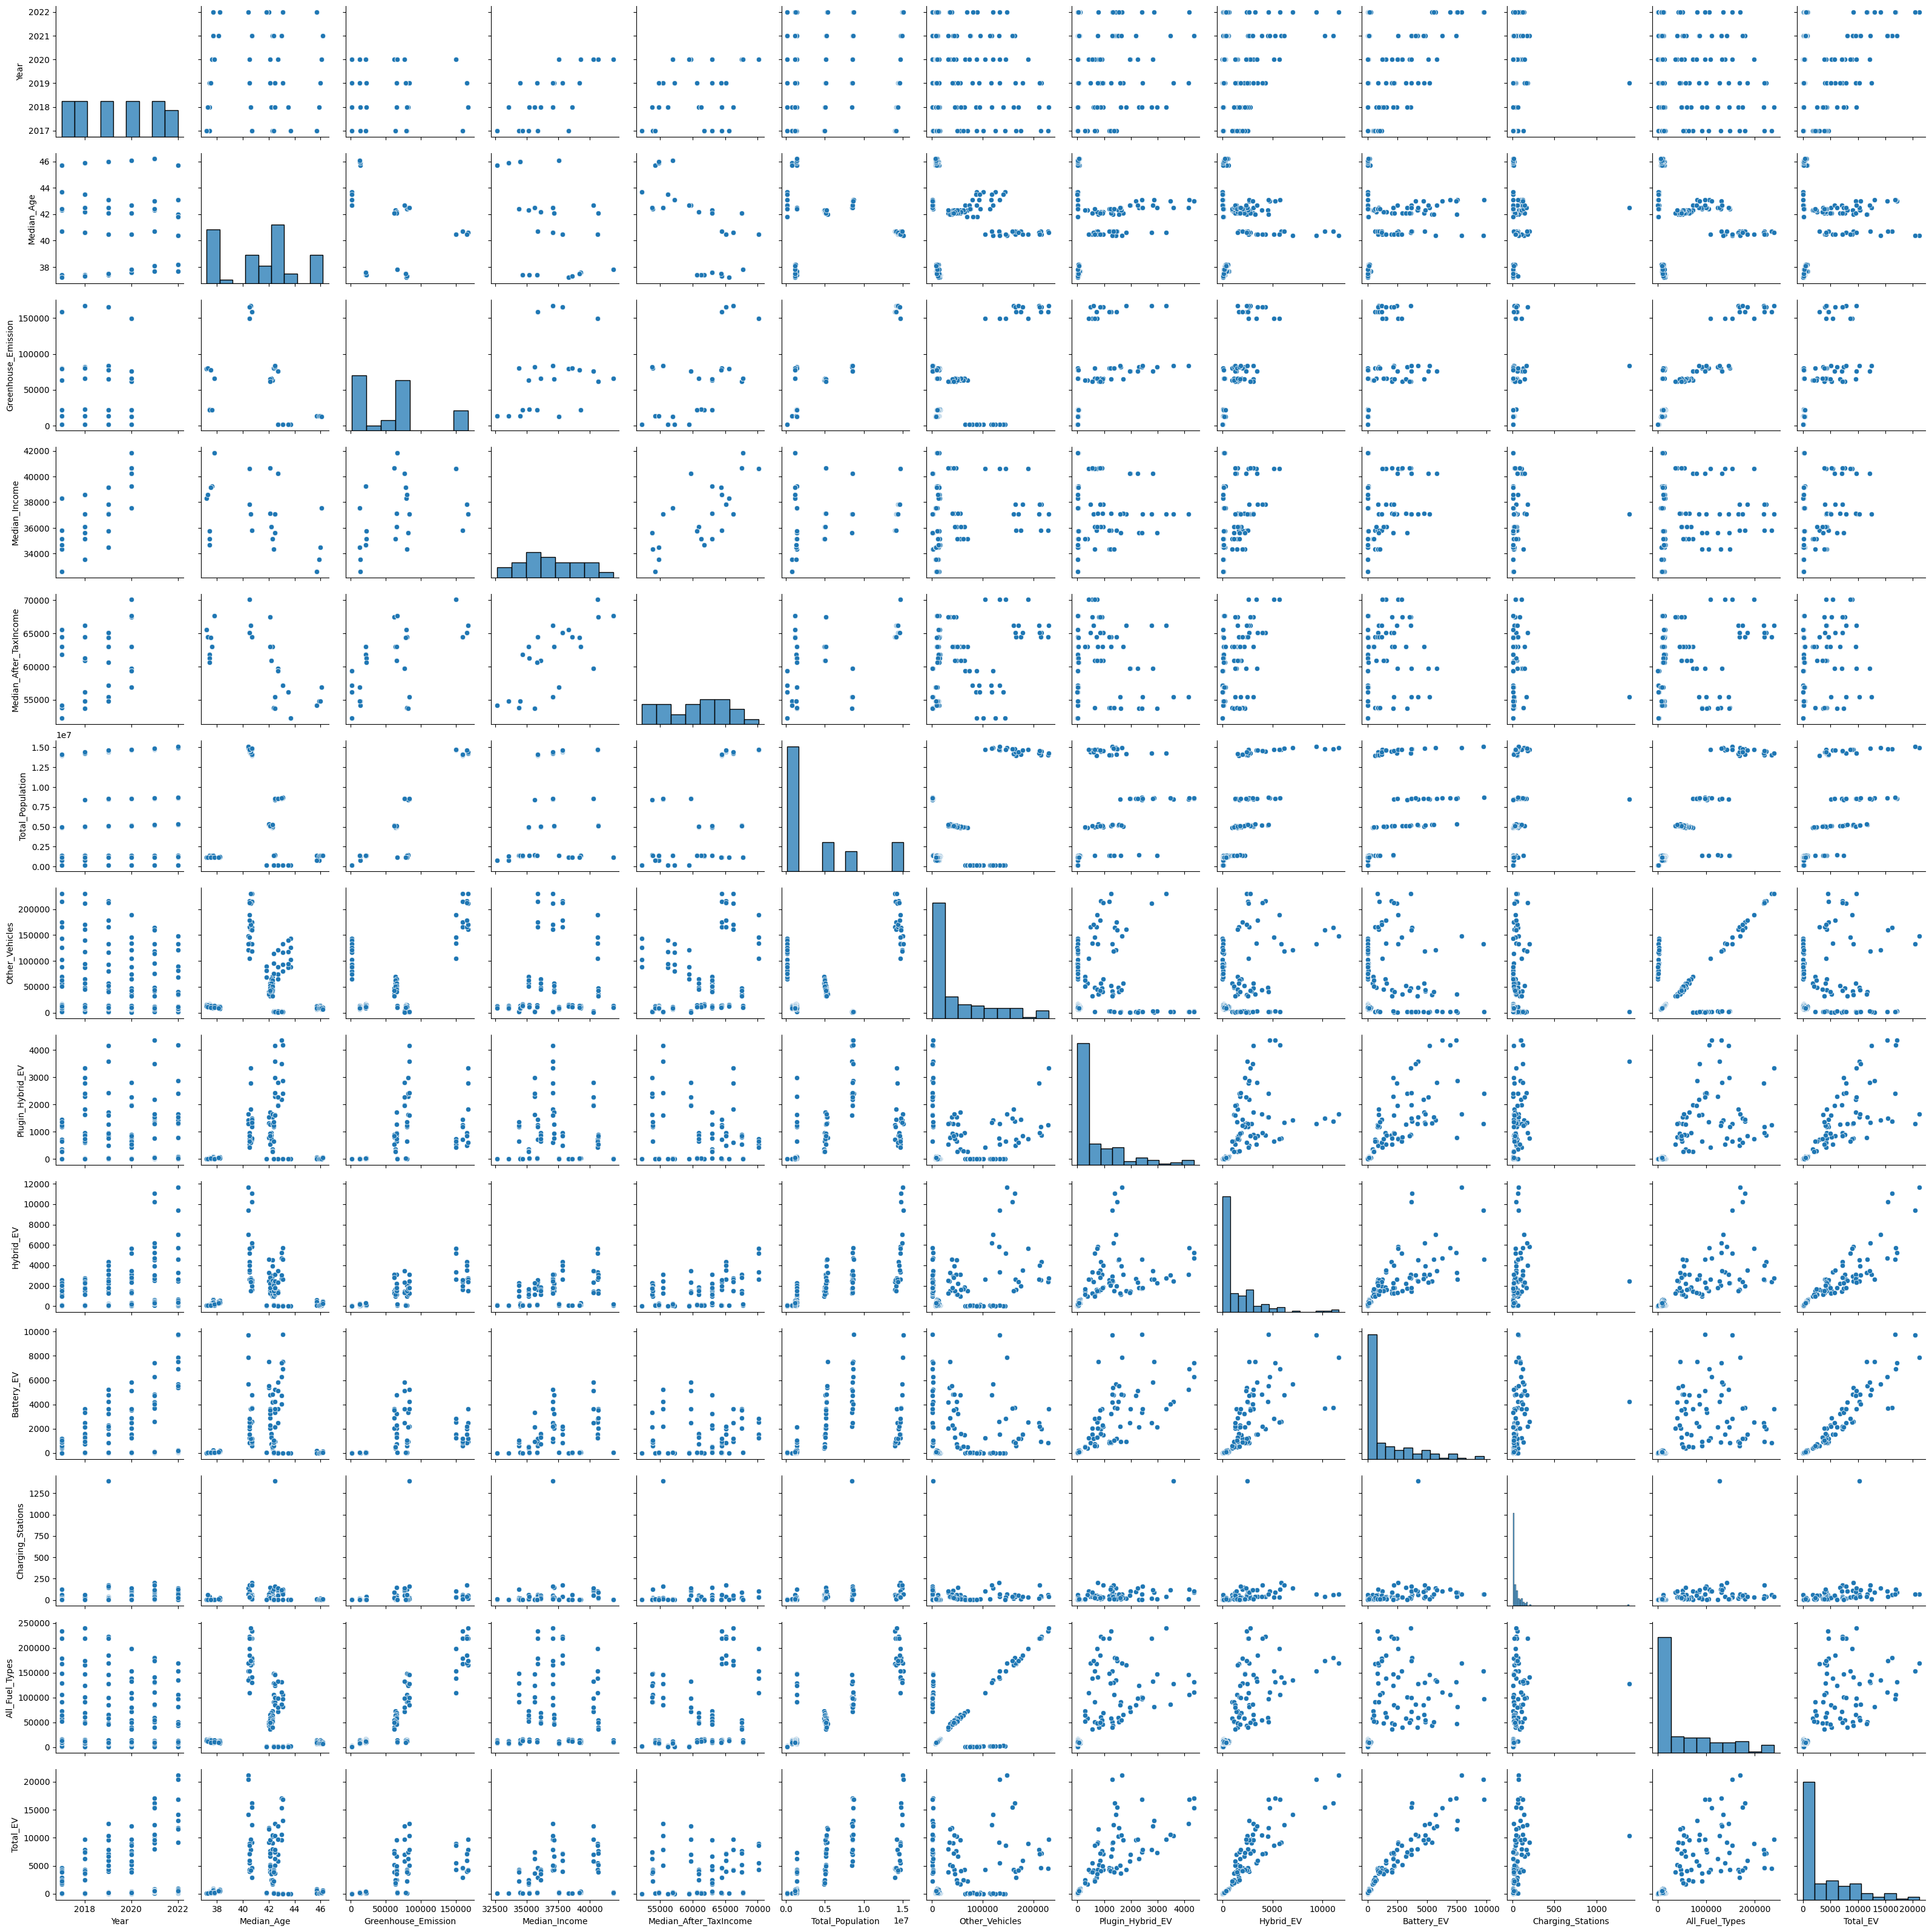

In [9]:
sns.pairplot(df)

<AxesSubplot:>

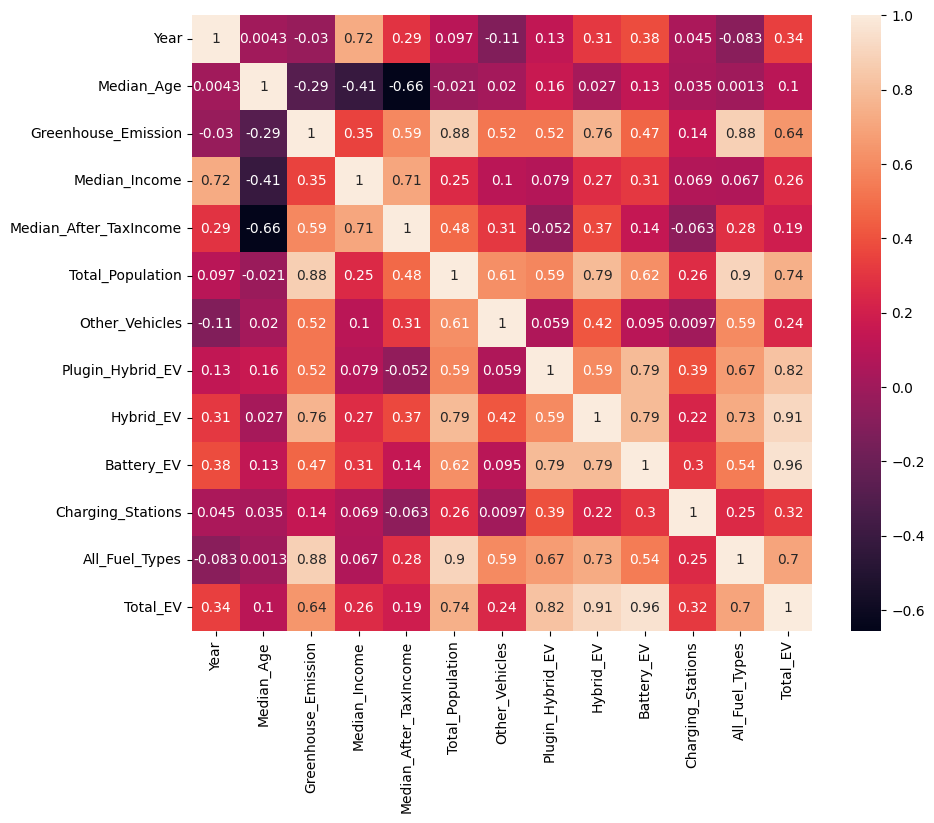

In [10]:
# check correlation of variables
plt.figure(figsize=(10,8))

corr = df.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

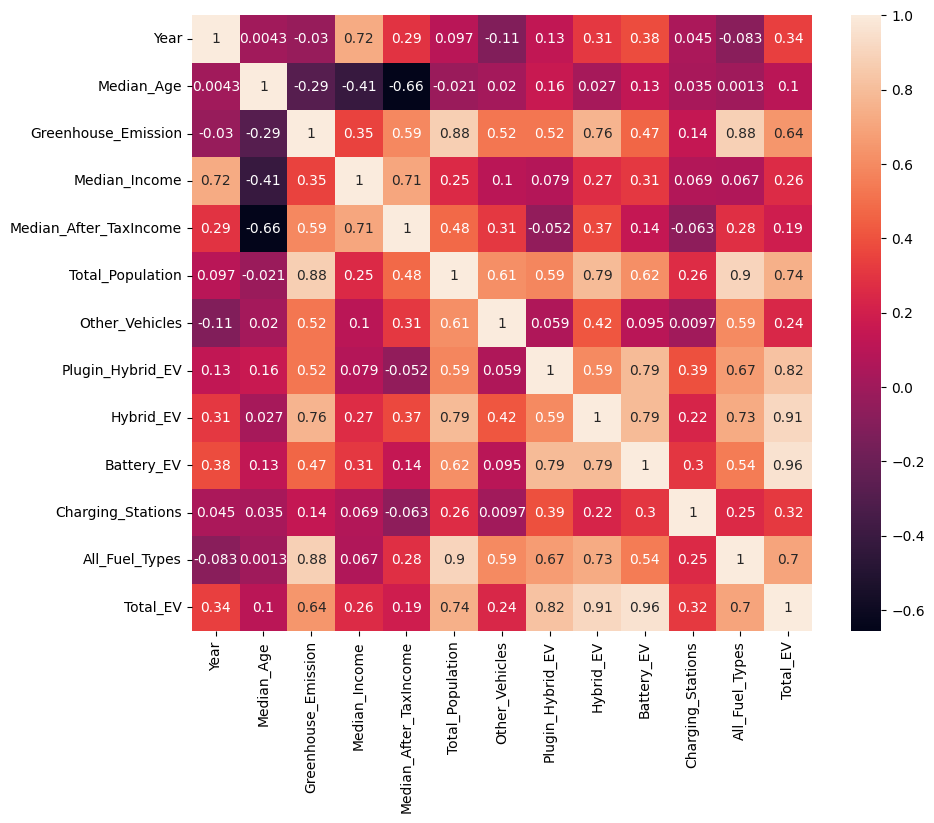

In [11]:
columns = ['Year', 'Median_Age',
       'Greenhouse_Emission', 'Median_Income', 'Median_After_TaxIncome',
       'Total_Population', 'Other_Vehicles', 'Plugin_Hybrid_EV', 'Hybrid_EV',
       'Battery_EV', 'Charging_Stations', 'All_Fuel_Types', 'Total_EV']


df_selected = df[columns]

plt.figure(figsize=(10,8))
corr = df_selected.corr()
sns.heatmap(corr, annot=True)

## Handling Missing Values
Fill missing values using forward fill in 3 columns and using 0 in Charging_Stations column


In [12]:
df['Charging_Stations'] = df['Charging_Stations'].fillna(0)

In [13]:
df['Greenhouse_Emission'].fillna(method='ffill', inplace=True)

In [14]:
df['Median_Income'].fillna(method='ffill', inplace=True)

In [15]:
df['Median_After_TaxIncome'].fillna(method='ffill', inplace=True)

In [16]:
df.isnull().sum()

Province                  0
Province_Code             0
Quarter                   0
Year                      0
Median_Age                0
Greenhouse_Emission       0
Median_Income             0
Median_After_TaxIncome    0
Total_Population          0
Other_Vehicles            0
Plugin_Hybrid_EV          0
Hybrid_EV                 0
Battery_EV                0
Charging_Stations         0
All_Fuel_Types            0
Total_EV                  0
dtype: int64

### after fill missing values

<AxesSubplot:>

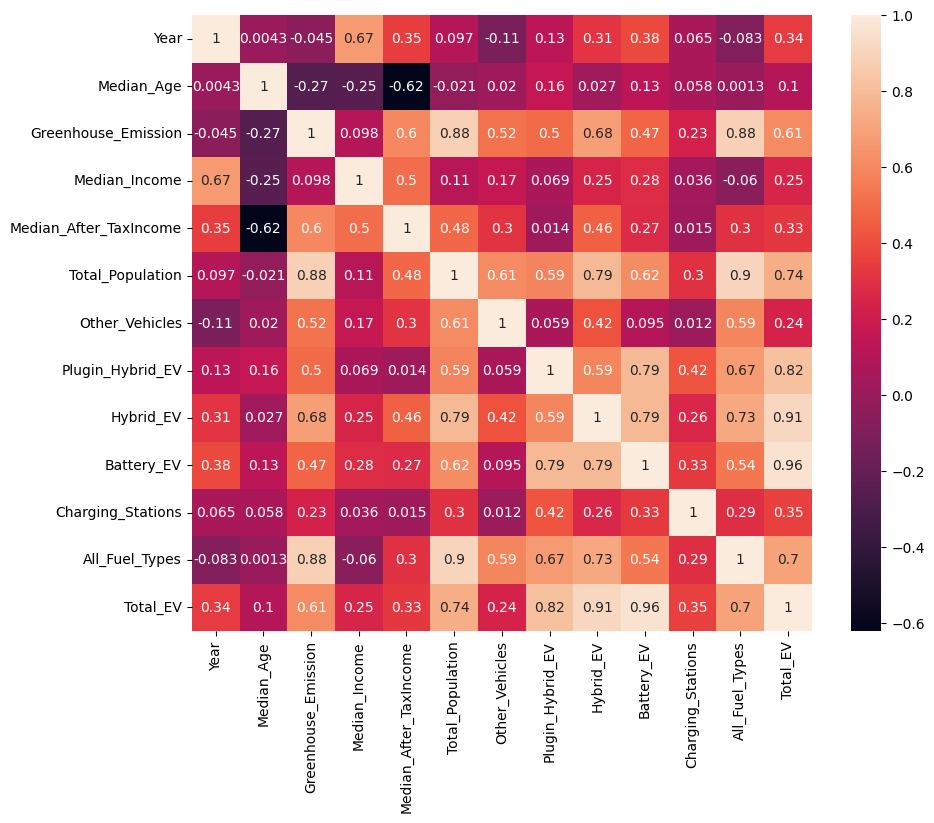

In [17]:
plt.figure(figsize=(10,8))

corr = df.corr()
sns.heatmap(corr, annot=True)

#### Missing value imputation using the MissForest based on Random Forestalgorithm

In [40]:
pip install missingpy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 49.1/49.1 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
# import sys
# import sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

# from missingpy import MissForest
# import warnings

# # ignore all warnings
# warnings.filterwarnings('ignore')

# # Create an instance of the MissForest imputer
# imputer = MissForest()

# # Fit the imputer to the data
# imputed_data = imputer.fit_transform(df)

# # Convert the imputed data to a dataframe
# imputed_df= pd.DataFrame(imputed_data, columns=df.columns)

In [18]:
df['Province'].unique()

array(['Ontario', 'British Columbia', 'Quebec', 'Prince Edward Island',
       'New Brunswick', 'Manitoba', 'Saskatchewan'], dtype=object)

In [19]:
print('max count of Hybrid electric: ' ,df['Hybrid_EV'].max())
print('max count of Hybrid electric: ' ,df['Hybrid_EV'].mean())
print('max count of Hybrid electric: ', df['Hybrid_EV'].min())

max count of Hybrid electric:  11650
max count of Hybrid electric:  1478.4285714285713
max count of Hybrid electric:  8


In [20]:
print('max count of Hybrid electric: ' ,df['Plugin_Hybrid_EV'].max())
print('max count of Hybrid electric: ' ,df['Plugin_Hybrid_EV'].mean())
print('max count of Hybrid electric: ', df['Plugin_Hybrid_EV'].min())

max count of Hybrid electric:  4355
max count of Hybrid electric:  685.7453416149068
max count of Hybrid electric:  0


In [21]:
print('max count of Hybrid electric: ' ,df['Battery_EV'].max())
print('max count of Hybrid electric: ' ,df['Battery_EV'].mean())
print('max count of Hybrid electric: ', df['Battery_EV'].min())

max count of Hybrid electric:  9784
max count of Hybrid electric:  1408.5155279503106
max count of Hybrid electric:  0


## Electric Vehicle Trend in All Provinces

In [22]:
All_fuel_typesdf = df.groupby(['Province', 'Province_Code'], as_index=False).agg({'All_Fuel_Types':'sum'}).sort_values('All_Fuel_Types', ascending=False)
All_fuel_typesdf

Province Province_Code  All_Fuel_Types
3               Ontario            ON         4081903
5                Quebec            QC         2479486
0      British Columbia            BC         1223764
1              Manitoba            MB          286205
6          Saskatchewan            SK          280856
2         New Brunswick            NB          221427
4  Prince Edward Island            PE           41766

Text(0, 0.5, 'All Fuel Types Vehicles')

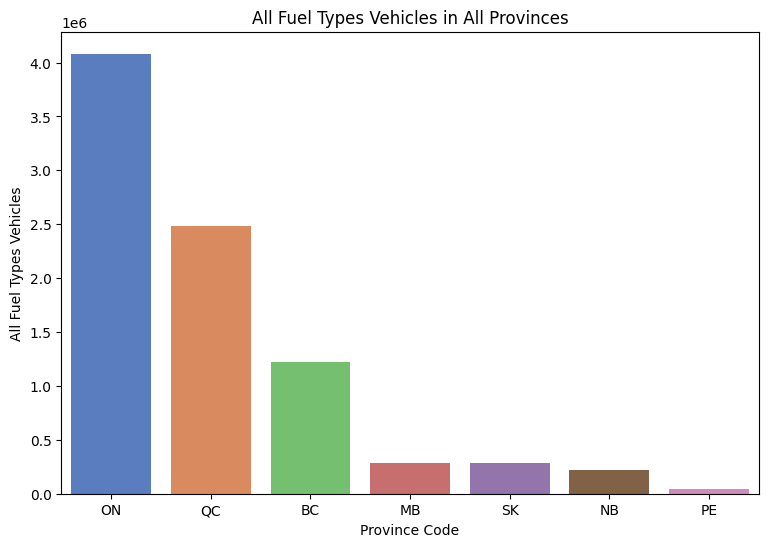

In [23]:
plt.figure(figsize=(9,6))

sns.barplot(x='Province_Code', y='All_Fuel_Types', data=All_fuel_typesdf, palette='muted')
plt.title('All Fuel Types Vehicles in All Provinces')
plt.xlabel('Province Code')
plt.ylabel('All Fuel Types Vehicles')

In [24]:
Battery_electric_df = df.groupby(['Province', 'Province_Code'], as_index=False).agg({'Battery_EV':'sum'}).sort_values('Battery_EV', ascending=False)
Battery_electric_df

Province Province_Code  Battery_EV
5                Quebec            QC       90865
0      British Columbia            BC       67902
3               Ontario            ON       64529
1              Manitoba            MB        1310
6          Saskatchewan            SK         968
2         New Brunswick            NB         897
4  Prince Edward Island            PE         300

Text(0.5, 1.0, 'Battery electric Vehicles in All Provinces')

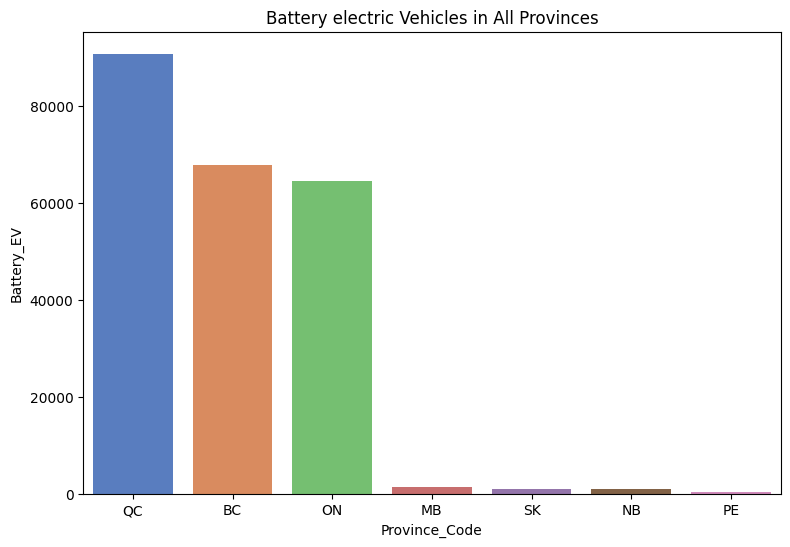

In [25]:
plt.figure(figsize=(9,6))

sns.barplot(x='Province_Code', y='Battery_EV', data=Battery_electric_df, palette='muted')
plt.title('Battery electric Vehicles in All Provinces')

In [26]:
Hybrid_electric_df = df.groupby(['Province', 'Province_Code'], as_index=False).agg({'Hybrid_EV':'sum'}).sort_values('Hybrid_EV', ascending=False)
Hybrid_electric_df

Province Province_Code  Hybrid_EV
3               Ontario            ON     110553
5                Quebec            QC      59326
0      British Columbia            BC      52945
1              Manitoba            MB       5582
2         New Brunswick            NB       4474
6          Saskatchewan            SK       4239
4  Prince Edward Island            PE        908

Text(0.5, 1.0, 'Hybrid electric Vehicles in All Provinces')

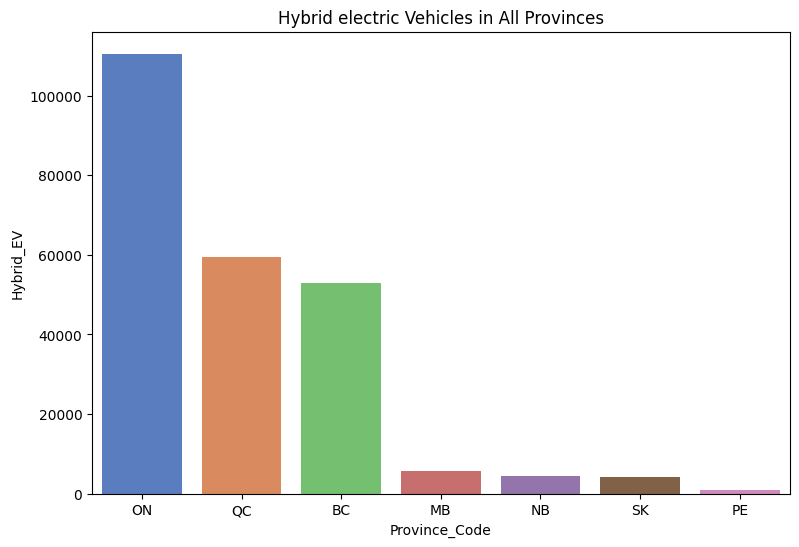

In [27]:
plt.figure(figsize=(9,6))

sns.barplot(x='Province_Code', y='Hybrid_EV', data=Hybrid_electric_df, palette='muted')

plt.title('Hybrid electric Vehicles in All Provinces')

In [28]:
Plug_in_df = df.groupby(['Province', 'Province_Code'],as_index=False).agg({'Plugin_Hybrid_EV':'sum'}).sort_values('Plugin_Hybrid_EV', ascending=False)
Plug_in_df

Province Province_Code  Plugin_Hybrid_EV
5                Quebec            QC             58444
3               Ontario            ON             28085
0      British Columbia            BC             21694
1              Manitoba            MB               883
2         New Brunswick            NB               616
6          Saskatchewan            SK               539
4  Prince Edward Island            PE               144

Text(0.5, 1.0, 'Plug-in hybrid electric Vehicles in All Provinces')

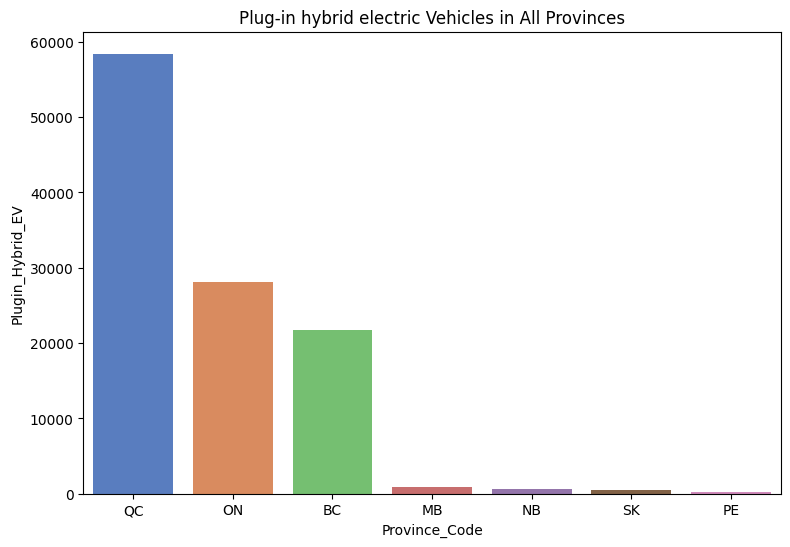

In [29]:
plt.figure(figsize=(9,6))

sns.barplot(x='Province_Code', y='Plugin_Hybrid_EV', data=Plug_in_df, palette='muted')

plt.title('Plug-in hybrid electric Vehicles in All Provinces')

In [30]:
df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7             149585.0   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4        40630.0                 70100.0          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

In [31]:
df['Year'] = df['Year'].astype('str')

In [32]:
df['Year'].dtypes

dtype('O')

In [33]:
year_df = df.groupby('Year',as_index=False).agg({'Hybrid_EV':'sum','Plugin_Hybrid_EV':'sum','Battery_EV':'sum'}).sort_values('Year', ascending=True)
year_df

Year  Hybrid_EV  Plugin_Hybrid_EV  Battery_EV
0  2017      21571             10368        8863
1  2018      23161             21238       21999
2  2019      33438             20003       34494
3  2020      36307             14781       37782
4  2021      68141             25858       56273
5  2022      55409             18157       67360

<AxesSubplot:xlabel='Year', ylabel='Hybrid_EV'>

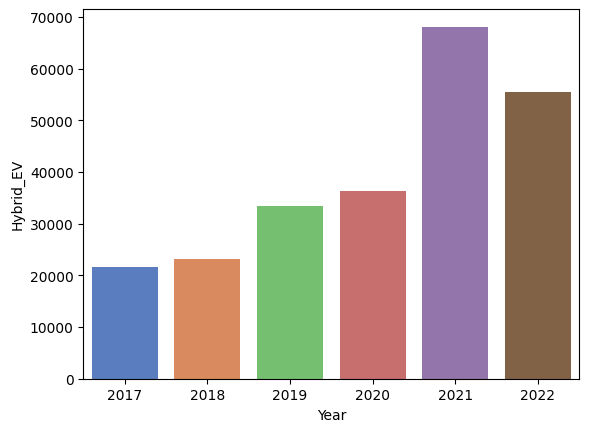

In [34]:
sns.barplot(x='Year', y='Hybrid_EV', data=year_df,palette='muted')

In [35]:
fig = px.bar(year_df, x='Year', y='Hybrid_EV',title='Hybrid EV Sales Over Year',
             hover_data=['Year', 'Hybrid_EV'], color='Battery_EV', height=550)
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Plugin_Hybrid_EV'>

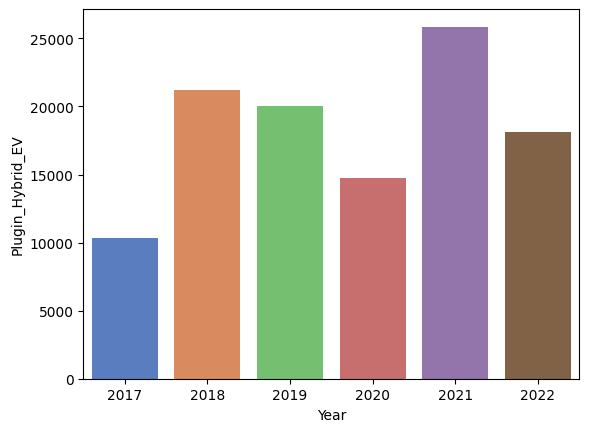

In [36]:
sns.barplot(x='Year', y='Plugin_Hybrid_EV', data=year_df, palette='muted')

In [37]:
fig = px.bar(year_df, x='Year', y='Plugin_Hybrid_EV',title="Plugin Hybrid EV Sales Over Year",
             hover_data=['Year', 'Plugin_Hybrid_EV'], color='Plugin_Hybrid_EV', height=550)
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Battery_EV'>

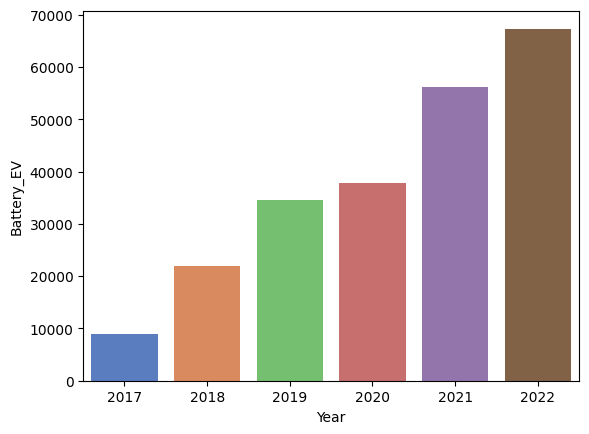

In [38]:
sns.barplot(x='Year', y='Battery_EV', data=year_df, palette='muted')

In [39]:
fig = px.bar(year_df, x='Year', y='Battery_EV', title="Battery EV Sales Over Year",
             hover_data=['Year', 'Battery_EV'], color='Battery_EV',height=550)
fig.show()

## Vehicles Trend Over Time (From 2017 to 2022)

Text(0.5, 1.0, 'EV trend over time')

<Figure size 1500x900 with 0 Axes>

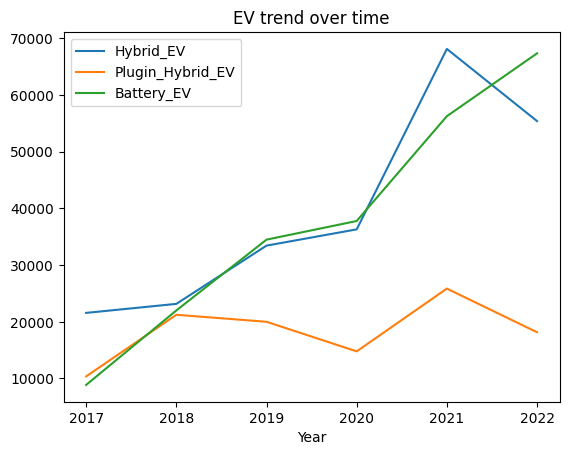

In [40]:
plt.figure(figsize=(15,9))

year_df.plot(x="Year", kind="line")

plt.title('EV trend over time')

Text(0.5, 1.0, 'Hybrid electric trend over time')

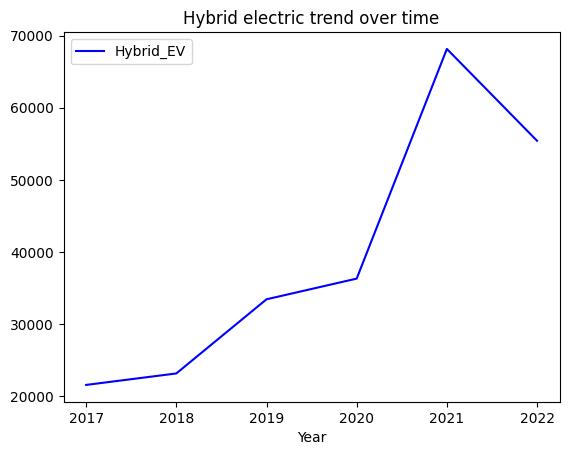

In [41]:
year_df.plot(x='Year', y='Hybrid_EV', kind="line", color='b')
plt.title('Hybrid electric trend over time')

Text(0.5, 1.0, 'Battery electric trend over time')

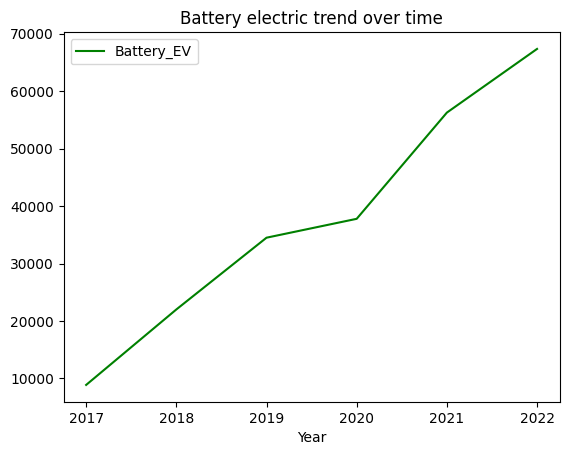

In [42]:
year_df.plot(x='Year', y='Battery_EV', kind="line", color='green')
plt.title('Battery electric trend over time')

In [43]:
fig = px.line(year_df, x='Year', y='Battery_EV',text="Battery_EV", title='Battery EV Trend')
fig.update_traces(textposition="bottom right")
fig.show()

Text(0.5, 1.0, 'Plug-in hybrid electric trend over time')

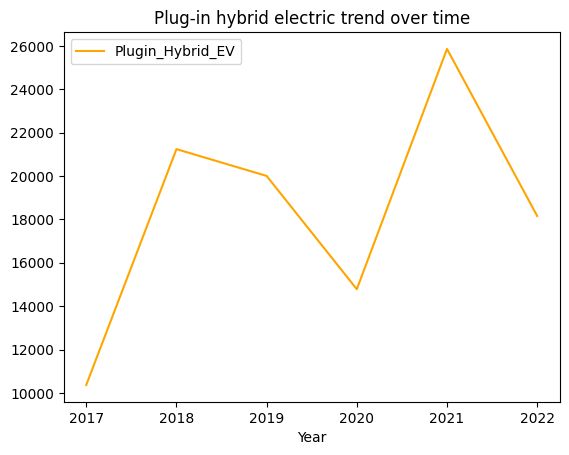

In [44]:
year_df.plot(x='Year', y='Plugin_Hybrid_EV', kind="line", color='orange')
plt.title('Plug-in hybrid electric trend over time')

In [45]:
fuel_df = df.groupby(('Year'), as_index=False).agg({'All_Fuel_Types':'sum','Total_EV':'sum'}).sort_values('Year', ascending=True)
fuel_df

Year  All_Fuel_Types  Total_EV
0  2017         1691043     40802
1  2018         1648102     66398
2  2019         1620721     87935
3  2020         1294099     88870
4  2021         1381993    150272
5  2022          979449    140926

<AxesSubplot:xlabel='Year'>

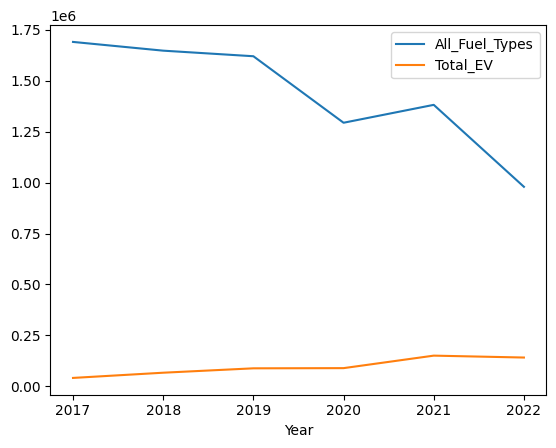

In [46]:
fuel_df.plot(x='Year', y=['All_Fuel_Types','Total_EV'], kind='line')

In [47]:
df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7             149585.0   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4        40630.0                 70100.0          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

In [48]:
Quarter_df = df.groupby(['Quarter','Year'],as_index=False).agg({'Hybrid_EV':'sum','Plugin_Hybrid_EV':'sum','Battery_EV':'sum'}).sort_values('Year', ascending=True)
Quarter_df

Quarter  Year  Hybrid_EV  Plugin_Hybrid_EV  Battery_EV
0       Q1  2017       3752              1759        1618
6       Q2  2017       6439              2760        2149
18      Q4  2017       4862              3124        2743
12      Q3  2017       6518              2725        2353
1       Q1  2018       3954              4130        2590
19      Q4  2018       5800              3793        5885
7       Q2  2018       7177              7342        7277
13      Q3  2018       6230              5973        6247
2       Q1  2019       5716              2897        5095
20      Q4  2019       7438              4325        7537
8       Q2  2019      11205              6877       12073
14      Q3  2019       9079              5904        9789
3       Q1  2020       6666              3417        8183
9       Q2  2020       5540              2995        5846
21      Q4  2020      11019              3835       11586
15      Q3  2020      13082              4534       12167
22      Q4  2021      12756              6337       13277
10      Q2  2021      22571              7465       15563
4       Q1  2021      12327              4366       12274
16      Q3  2021      20487              7690       15159
17      Q3  2022      18556              4648       27698
5       Q1  2022      12949              5855       18903
11      Q2  2022      23904              7654       20759

### Three years of data 2020, 2021 and 2022

<AxesSubplot:xlabel='Year'>

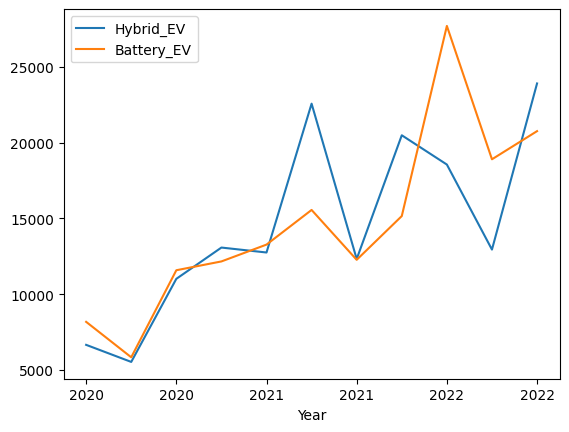

In [49]:
Quarter_df[Quarter_df['Year'] >= '2020'].plot(x='Year', y=['Hybrid_EV','Battery_EV'],kind='line')

<AxesSubplot:xlabel='Year'>

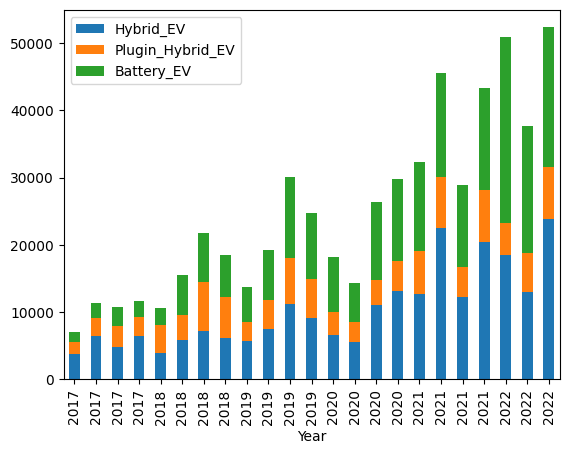

In [50]:
Quarter_df.plot(x='Year',kind='bar', stacked=True)

In [31]:
# df.groupby(['Quarter','Year']).agg({'Hybrid_EV':'sum'})

In [51]:
year_with_province = df.groupby(['Year','Province_Code'],as_index=False).agg({'Hybrid_EV':'sum','Plugin_Hybrid_EV':'sum','Battery_EV':'sum'}).sort_values(['Battery_EV', 'Plugin_Hybrid_EV'], ascending=False)
year_with_province.head()

Year Province_Code  Hybrid_EV  Plugin_Hybrid_EV  Battery_EV
40  2022            QC      12986              9479       24219
38  2022            ON      28084              4388       23285
33  2021            QC      15643             14388       22412
35  2022            BC      10300              3650       18445
28  2021            BC      13934              5781       18069

Text(0.5, 0, 'Year')

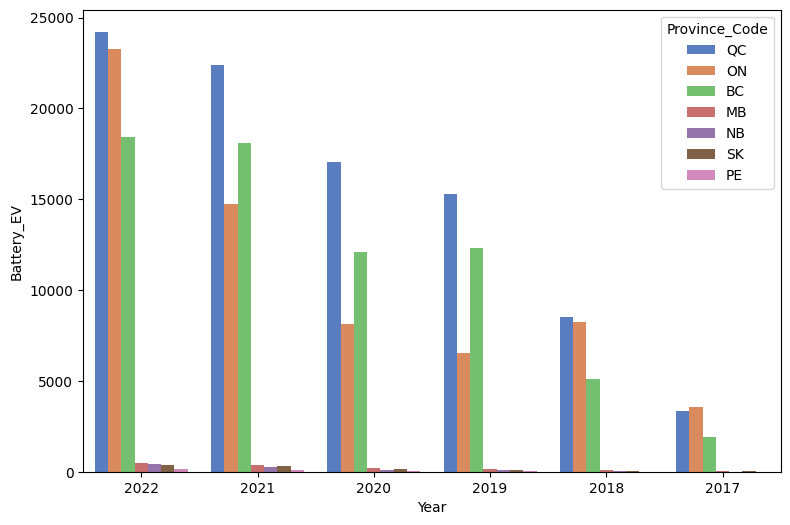

In [52]:
plt.figure(figsize=(9,6))
sns.barplot(x='Year', y='Battery_EV',hue='Province_Code', data=year_with_province, palette='muted')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

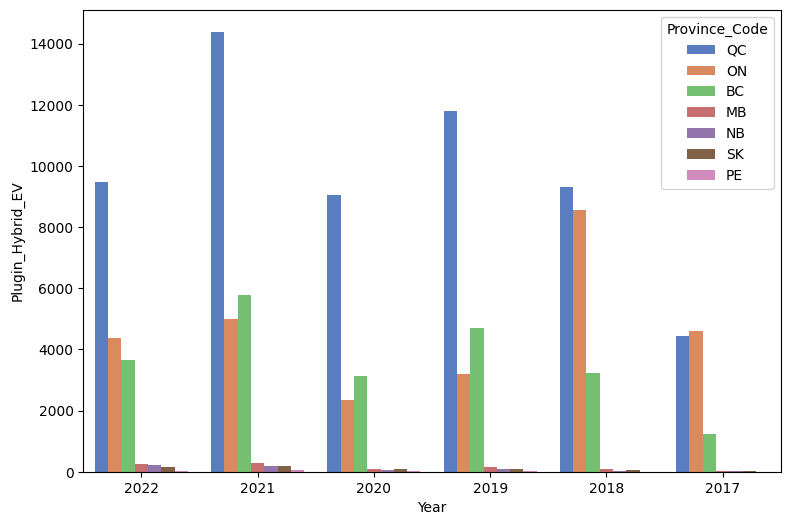

In [53]:
plt.figure(figsize=(9,6))
sns.barplot(x='Year', y='Plugin_Hybrid_EV',hue='Province_Code', data=year_with_province, palette='muted')
plt.xlabel('Year')

## EV Charging Stations

In [54]:
df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7             149585.0   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4        40630.0                 70100.0          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

In [55]:
df['Charging_Stations'].dtypes

dtype('float64')

In [56]:
EV_station = df.groupby(['Province','Province_Code'], as_index=False).agg({'Charging_Stations':'sum'}).sort_values('Charging_Stations', ascending=False)
EV_station

Province Province_Code  Charging_Stations
5                Quebec            QC             2897.0
3               Ontario            ON             1577.0
0      British Columbia            BC             1060.0
6          Saskatchewan            SK              135.0
2         New Brunswick            NB              102.0
1              Manitoba            MB               98.0
4  Prince Edward Island            PE               43.0

In [57]:
fig = px.bar(EV_station,x='Province_Code', y='Charging_Stations', color_discrete_sequence =['blue']*len(df))
fig.show()

In [58]:
fig = px.bar(EV_station, x='Province_Code', y='Charging_Stations',text_auto='.2s',title="Charging Stations in All Provinces",
             hover_data=['Province_Code','Charging_Stations'], color='Charging_Stations',height=550)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


In [59]:
# e.	Charging station vs EV sales
# f.	Provincewise GHG and EV sales increase 
ge_df = df.groupby(['Province','Province_Code'], as_index=False).agg({'Greenhouse_Emission':'sum'}).sort_values('Greenhouse_Emission', ascending=True)
ge_df

Province Province_Code  Greenhouse_Emission
4  Prince Edward Island            PE              37358.0
2         New Brunswick            NB             298731.0
1              Manitoba            MB             504998.0
0      British Columbia            BC            1455989.0
6          Saskatchewan            SK            1676218.0
5                Quebec            QC            1821331.0
3               Ontario            ON            3612343.0

In [60]:
fig = px.bar(ge_df, x='Province_Code', y='Greenhouse_Emission',text_auto='.2s',title="Greenhouse Emission in All Provinces",
             hover_data=['Province_Code','Greenhouse_Emission'], color='Greenhouse_Emission',height=550)

# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [62]:
! pip install bubbly

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5416 sha256=b0435ca20ae86ef160e5664e3d9f5b1d567058709f3d60b1f0493057e318a441
  Stored in directory: c:\users\14377\appdata\local\pip\cache\wheels\f7\b8\85\5fdfe7bcc88b1579581f046004f953b05c9ca7387fb373cf2d
Successfully built bubbly


In [63]:
import plotly.offline as py
from bubbly.bubbly import bubbleplot

In [64]:
px.scatter_geo(EV_station, locations="Province_Code",
               color="Province",
               hover_name="Province_Code",
               size="Charging_Stations",
               projection="natural earth")

## Total EV and Charging Station over year

In [65]:
px.scatter(df, x="Total_EV", y="Charging_Stations",
           animation_frame="Year",
           size="Total_Population",
           color="Province",
           hover_name="Province",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[10,100])

### No Correlation Between Variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total_EV', ylabel='Total_Population'>

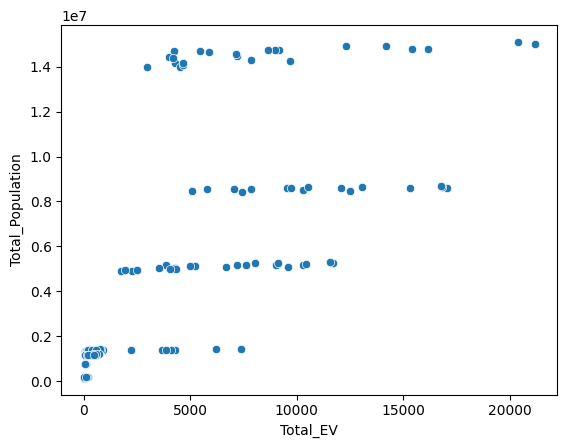

In [66]:
sns.scatterplot(df['Total_EV'], df['Total_Population'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total_EV', ylabel='Greenhouse_Emission'>

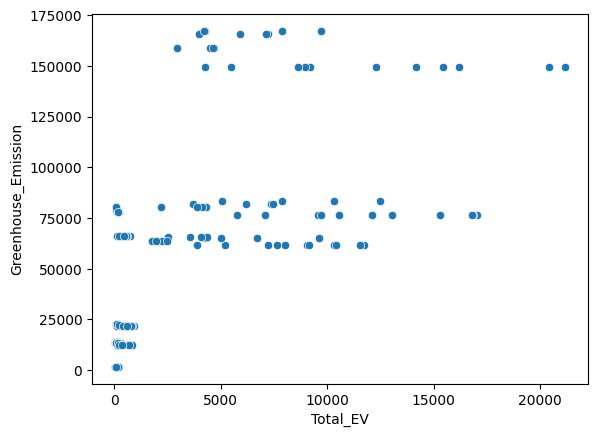

In [67]:
sns.scatterplot(df['Total_EV'], df['Greenhouse_Emission'])

In [68]:
pop_df =  df.groupby(['Province','Province_Code'], as_index=False).agg({'Total_Population':'sum'}).sort_values('Total_Population', ascending=False)
pop_df

Province Province_Code  Total_Population
3               Ontario            ON         334521399
5                Quebec            QC         146872248
0      British Columbia            BC         117239044
1              Manitoba            MB          31487947
2         New Brunswick            NB          27089108
6          Saskatchewan            SK          26932107
4  Prince Edward Island            PE           3642415

In [69]:
px.scatter_geo(pop_df, locations="Province_Code",
               color="Province",
               hover_name="Province_Code",
               size="Total_Population",
               projection="natural earth")


# center=dict(lat=56.1304, lon=106.3468)

## Median Income

In [70]:
income_df = df.groupby(['Province','Province_Code'], as_index=False).agg({'Median_Income':'sum'}).sort_values('Median_Income', ascending=False)
income_df

Province Province_Code  Median_Income
4  Prince Edward Island            PE       925750.0
6          Saskatchewan            SK       924590.0
3               Ontario            ON       889770.0
0      British Columbia            BC       880820.0
5                Quebec            QC       870870.0
1              Manitoba            MB       854120.0
2         New Brunswick            NB       815460.0

In [71]:
fig = px.bar(income_df,x='Province_Code', y='Median_Income' )
fig.show()

In [72]:
df.columns

Index(['Province', 'Province_Code', 'Quarter', 'Year', 'Median_Age',
       'Greenhouse_Emission', 'Median_Income', 'Median_After_TaxIncome',
       'Total_Population', 'Other_Vehicles', 'Plugin_Hybrid_EV', 'Hybrid_EV',
       'Battery_EV', 'Charging_Stations', 'All_Fuel_Types', 'Total_EV'],
      dtype='object')

In [73]:
df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7             149585.0   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4        40630.0                 70100.0          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

## Final df

In [74]:
final_df = df.copy()
final_df.head()

Province Province_Code Quarter  Year  Median_Age  Greenhouse_Emission  \
0  Ontario            ON      Q1  2017        40.7             158945.0   
1  Ontario            ON      Q1  2018        40.6             167268.0   
2  Ontario            ON      Q1  2019        40.5             165514.0   
3  Ontario            ON      Q1  2020        40.5             149585.0   
4  Ontario            ON      Q1  2021        40.7             149585.0   

   Median_Income  Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0        35830.0                 64500.0          13971785          165279   
1        37060.0                 66200.0          14186830          161131   
2        37820.0                 65100.0          14426822          164967   
3        40630.0                 70100.0          14686092          133649   
4        40630.0                 70100.0          14740102          132609   

   Plugin_Hybrid_EV  Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  \
0               724       1633         595               57.0          168231   
1              1820       1522         928               18.0          165401   
2               493       2648         849               40.0          168957   
3               548       3365        1554               39.0          139116   
4               761       5850        2568              202.0          141788   

   Total_EV  
0      2952  
1      4270  
2      3990  
3      5467  
4      9179

In [75]:
quarter_dict = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
final_df['Quarter_num'] = final_df['Quarter'].map(quarter_dict)

In [76]:
province_dict = {'ON':1, 'BC':2, 'QC':3, 'PE':4, 'NB':5, 'MB':6, 'SK':7}
final_df['province_Num'] = final_df['Province_Code'].map(province_dict)

In [77]:
final_df.drop(['Province','Province_Code','Quarter'], axis=1, inplace=True)

In [78]:
final_df.head()

Year  Median_Age  Greenhouse_Emission  Median_Income  \
0  2017        40.7             158945.0        35830.0   
1  2018        40.6             167268.0        37060.0   
2  2019        40.5             165514.0        37820.0   
3  2020        40.5             149585.0        40630.0   
4  2021        40.7             149585.0        40630.0   

   Median_After_TaxIncome  Total_Population  Other_Vehicles  Plugin_Hybrid_EV  \
0                 64500.0          13971785          165279               724   
1                 66200.0          14186830          161131              1820   
2                 65100.0          14426822          164967               493   
3                 70100.0          14686092          133649               548   
4                 70100.0          14740102          132609               761   

   Hybrid_EV  Battery_EV  Charging_Stations  All_Fuel_Types  Total_EV  \
0       1633         595               57.0          168231      2952   
1       1522         928               18.0          165401      4270   
2       2648         849               40.0          168957      3990   
3       3365        1554               39.0          139116      5467   
4       5850        2568              202.0          141788      9179   

   Quarter_num  province_Num  
0            1             1  
1            1             1  
2            1             1  
3            1             1  
4            1             1

In [79]:
final_df['Year'] = final_df['Year'].astype(int)

In [80]:
final_df.dtypes

Year                        int32
Median_Age                float64
Greenhouse_Emission       float64
Median_Income             float64
Median_After_TaxIncome    float64
Total_Population            int64
Other_Vehicles              int64
Plugin_Hybrid_EV            int64
Hybrid_EV                   int64
Battery_EV                  int64
Charging_Stations         float64
All_Fuel_Types              int64
Total_EV                    int64
Quarter_num                 int64
province_Num                int64
dtype: object

## Split Data

### By Removing 'Plugin_Hybrid_EV', 'Hybrid_EV', 'Battery_EV', and target 'Total_EV'

In [81]:
X = final_df.drop(['Plugin_Hybrid_EV','Hybrid_EV','Battery_EV','Total_EV'], axis=1)
y = final_df['Total_EV']

In [82]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [84]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train2, y_train)
y_pred = reg.predict(X_test2)

# Evaluate the model
print("Training R-squared score:", reg.score(X_train2, y_train))
print("Testing R-squared score:", reg.score(X_test2, y_test))


Training R-squared score: 0.8242958306484575
Testing R-squared score: 0.6051156979261436


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the random forest model
rf_model_hybrid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hybrid.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = rf_model_hybrid.predict(X_test2)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("Random Forest Testing R-squared score for hybrid electric:", r2)

Random Forest Testing R-squared score for hybrid electric: 0.8867048148126688


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MAPE:", mape)
print("EVS:", evs)

MAPE: 0.36981700415749175
EVS: 0.8881200887570817


#### These metrics are calculated based on the predictions made by the regression model and the actual values from the dataset.


MAPE (Mean Absolute Percentage Error): On average, the predicted target variable values are off by 0.37% from the actual target variable values. MAPE is a measure of the relative error.

EVS (Explained Variance Score): The proportion of variance in the target variable that is explained by the model. In this case, 88.81% of the variance in the target variable is explained by the random forest regression model

# Repeating the same steps for PHEVs, Hybrid EV and Battery EV

In [89]:
X_1 = final_df.drop(['Plugin_Hybrid_EV','Hybrid_EV','Battery_EV','Total_EV'], axis=1)
y_1 = final_df['Plugin_Hybrid_EV']

In [90]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, test_size=0.2, random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1s = sc.fit_transform(X_train_1)
X_test_1s = sc.transform(X_test_1)

In [93]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_1s, y_train_1)
y_pred = reg.predict(X_test_1s)

# Evaluate the model
print("Training R-squared score:", reg.score(X_train_1s, y_train_1))
print("Testing R-squared score:", reg.score(X_test_1s, y_test_1))

Training R-squared score: 0.7903287056178268
Testing R-squared score: 0.8427007795649176


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the random forest model
rf_model_hybrid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hybrid.fit(X_train_1s, y_train_1)

# Make predictions on the test set
y_pred_1 = rf_model_hybrid.predict(X_test_1s)

# Calculate the R-squared score on the test set
r2_1 = r2_score(y_test_1, y_pred_1)
print("Random Forest Testing R-squared score for PHEV:", r2)

Random Forest Testing R-squared score for PHEV: 0.8867048148126688


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

mape = mean_absolute_percentage_error(y_test_1, y_pred_1)
evs = explained_variance_score(y_test_1, y_pred_1)

print("MAPE:", mape)
print("EVS:", evs)

MAPE: 0.4236306225613573
EVS: 0.8771271122824962


## HYBRID EV

In [97]:
X_2 = final_df.drop(['Plugin_Hybrid_EV','Hybrid_EV','Battery_EV','Total_EV'], axis=1)
y_2 = final_df['Hybrid_EV']

In [98]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2s = sc.fit_transform(X_train_2)
X_test_2s = sc.transform(X_test_2)

In [100]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_2s, y_train_2)
y_pred_2 = reg.predict(X_test_2s)

# Evaluate the model
print("Training R-squared score:", reg.score(X_train_2s, y_train_2))
print("Testing R-squared score:", reg.score(X_test_2s, y_test_2))

Training R-squared score: 0.7535094654144456
Testing R-squared score: 0.42306089265050606


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the random forest model
rf_model_hybrid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hybrid.fit(X_train_2s, y_train_2)

# Make predictions on the test set
y_pred_2 = rf_model_hybrid.predict(X_test_2s)

# Calculate the R-squared score on the test set
r2_2 = r2_score(y_test_2, y_pred_2)
print("Random Forest Testing R-squared score for Hybrid EV:", r2_2)

Random Forest Testing R-squared score for Hybrid EV: 0.8746964315173303


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

mape = mean_absolute_percentage_error(y_test_2, y_pred_2)
evs = explained_variance_score(y_test_2, y_pred_2)

print("MAPE:", mape)
print("EVS:", evs)

MAPE: 0.3558481621321636
EVS: 0.8791975096863905


# For Battery EV

In [106]:
X_3 = final_df.drop(['Plugin_Hybrid_EV','Hybrid_EV','Battery_EV','Total_EV'], axis=1)
y_3 = final_df['Battery_EV']

In [107]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y_3, test_size=0.2, random_state=42)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_3s = sc.fit_transform(X_train_3)
X_test_3s = sc.transform(X_test_3)

In [109]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_3s, y_train_3)
y_pred_3 = reg.predict(X_test_3s)

# Evaluate the model
print("Training R-squared score:", reg.score(X_train_3s, y_train_3))
print("Testing R-squared score:", reg.score(X_test_3s, y_test_3))

Training R-squared score: 0.7558405185231882
Testing R-squared score: 0.48048575575604546


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the random forest model
rf_model_hybrid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hybrid.fit(X_train_3s, y_train_3)

# Make predictions on the test set
y_pred_3 = rf_model_hybrid.predict(X_test_3s)

# Calculate the R-squared score on the test set
r2_3 = r2_score(y_test_3, y_pred_3)
print("Random Forest Testing R-squared score for Battery EV:", r2_3)

Random Forest Testing R-squared score for Battery EV: 0.8642827071849983


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

mape = mean_absolute_percentage_error(y_test_3, y_pred_3)
evs = explained_variance_score(y_test_3, y_pred_3)

print("MAPE:", mape)
print("EVS:", evs)

MAPE: 958038466186087.9
EVS: 0.864401312075535


## Removing All vehicles types and target Total_EV

In [114]:
X = final_df.drop(['Plugin_Hybrid_EV','Hybrid_EV','Battery_EV','Total_EV','All_Fuel_Types'], axis=1)
y = final_df['Total_EV']

In [115]:
X.head()

Year  Median_Age  Greenhouse_Emission  Median_Income  \
0  2017        40.7             158945.0        35830.0   
1  2018        40.6             167268.0        37060.0   
2  2019        40.5             165514.0        37820.0   
3  2020        40.5             149585.0        40630.0   
4  2021        40.7             149585.0        40630.0   

   Median_After_TaxIncome  Total_Population  Other_Vehicles  \
0                 64500.0          13971785          165279   
1                 66200.0          14186830          161131   
2                 65100.0          14426822          164967   
3                 70100.0          14686092          133649   
4                 70100.0          14740102          132609   

   Charging_Stations  Quarter_num  province_Num  
0               57.0            1             1  
1               18.0            1             1  
2               40.0            1             1  
3               39.0            1             1  
4              202.0            1             1

In [116]:
X.shape, y.shape

((161, 10), (161,))

In [117]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [118]:
X_train.shape, X_test.shape

((128, 10), (33, 10))

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [120]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train2, y_train)
y_pred = reg.predict(X_test2)

# Evaluate the model
print("Training R-squared score:", reg.score(X_train2, y_train))
print("Testing R-squared score:", reg.score(X_test2, y_test))

Training R-squared score: 0.8011369033614595
Testing R-squared score: 0.5068141212217679


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Train the random forest model
rf_model_hybrid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hybrid.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = rf_model_hybrid.predict(X_test2)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("Random Forest Testing R-squared score for all ev types:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Testing MSE score for all ev types:", mse)
rmse = np.sqrt(mse)
print("Random Forest Testing RMSE score for all ev types:", rmse)

Random Forest Testing R-squared score for all ev types: 0.8602401786568342
Random Forest Testing MSE score for all ev types: 3171844.108639394
Random Forest Testing RMSE score for all ev types: 1780.9671834818837


In [122]:
mse = mean_squared_error(y_test, y_pred )
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 3171844.108639394
RMSE: 1780.9671834818837
R2: 0.8602401786568342


## Map of Canada and in bubble Total EV area wise and charging station are wise